# 01 - Data Exploration
## TCI6313 Computational Intelligence Project
### Air Quality Prediction using CI Models

---

**Objective:** Explore and understand the UCI Air Quality dataset before building CI models.

**Contents:**
1. Dataset Overview
2. Missing Value Analysis
3. Statistical Summary
4. Temporal Patterns
5. Feature Correlations
6. Target Variable Analysis

In [1]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

# Settings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
%matplotlib inline

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Load Dataset

The UCI Air Quality dataset contains hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device.

**Important Notes:**
- Delimiter: Semicolon (;)
- Decimal: Comma (,) - European format
- Missing values: Encoded as -200

In [2]:
# Load the dataset
DATA_PATH = '../data/AirQuality.csv'

# Load with European format (semicolon delimiter, comma decimal)
df_raw = pd.read_csv(
    DATA_PATH,
    sep=';',
    decimal=',',
    encoding='utf-8'
)

print(f"Dataset shape: {df_raw.shape}")
print(f"\nColumns: {list(df_raw.columns)}")

Dataset shape: (9471, 17)

Columns: ['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16']


In [3]:
# Display first few rows
df_raw.head(10)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN
5,10/03/2004,23.00.00,1.2,1197.0,38.0,4.7,750.0,89.0,1337.0,96.0,1393.0,949.0,11.2,59.2,0.7848,NaN,NaN
6,11/03/2004,00.00.00,1.2,1185.0,31.0,3.6,690.0,62.0,1462.0,77.0,1333.0,733.0,11.3,56.8,0.7603,NaN,NaN
7,11/03/2004,01.00.00,1.0,1136.0,31.0,3.3,672.0,62.0,1453.0,76.0,1333.0,730.0,10.7,60.0,0.7702,NaN,NaN
8,11/03/2004,02.00.00,0.9,1094.0,24.0,2.3,609.0,45.0,1579.0,60.0,1276.0,620.0,10.7,59.7,0.7648,NaN,NaN
9,11/03/2004,03.00.00,0.6,1010.0,19.0,1.7,561.0,-200.0,1705.0,-200.0,1235.0,501.0,10.3,60.2,0.7517,NaN,NaN


In [4]:
# Check data types
print("Data Types:")
print(df_raw.dtypes)

Data Types:
Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
Unnamed: 15      float64
Unnamed: 16      float64
dtype: object


## 2. Data Cleaning

### 2.1 Remove Empty Columns

In [5]:
# Drop columns that are completely empty
df = df_raw.dropna(axis=1, how='all')

# Drop rows that are completely empty
df = df.dropna(how='all')

print(f"Shape after removing empty columns/rows: {df.shape}")
print(f"Columns: {list(df.columns)}")

Shape after removing empty columns/rows: (9357, 15)
Columns: ['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']


### 2.2 Create DateTime Index

In [6]:
# Combine Date and Time into DateTime
df['DateTime'] = pd.to_datetime(
    df['Date'] + ' ' + df['Time'].str.replace('.', ':', regex=False),
    format='%d/%m/%Y %H:%M:%S',
    errors='coerce'
)

# Set as index
df = df.set_index('DateTime')
df = df.drop(['Date', 'Time'], axis=1)

print(f"Date range: {df.index.min()} to {df.index.max()}")
print(f"Duration: {(df.index.max() - df.index.min()).days} days")
df.head()

Date range: 2004-03-10 18:00:00 to 2005-04-04 14:00:00
Duration: 389 days


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
DateTime,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
2004-03-10 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2004-03-10 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
2004-03-10 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
2004-03-10 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


## 3. Missing Value Analysis

In this dataset, **-200** represents missing values (sensor malfunction or calibration).

In [7]:
# Replace -200 with NaN for proper missing value analysis
df_analysis = df.replace(-200, np.nan)

# Calculate missing value statistics
missing_stats = pd.DataFrame({
    'Missing Count': df_analysis.isnull().sum(),
    'Missing %': (df_analysis.isnull().sum() / len(df_analysis) * 100).round(2),
    'Valid Count': df_analysis.notnull().sum()
})

missing_stats = missing_stats.sort_values('Missing %', ascending=False)
print("Missing Value Analysis:")
print(missing_stats)

Missing Value Analysis:
               Missing Count  Missing %  Valid Count
NMHC(GT)                8443      90.23          914
CO(GT)                  1683      17.99         7674
NO2(GT)                 1642      17.55         7715
NOx(GT)                 1639      17.52         7718
PT08.S1(CO)              366       3.91         8991
PT08.S2(NMHC)            366       3.91         8991
C6H6(GT)                 366       3.91         8991
PT08.S3(NOx)             366       3.91         8991
PT08.S4(NO2)             366       3.91         8991
PT08.S5(O3)              366       3.91         8991
T                        366       3.91         8991
RH                       366       3.91         8991
AH                       366       3.91         8991


## 4. Statistical Summary

In [9]:
# Descriptive statistics (excluding -200 values)
print("Descriptive Statistics (excluding missing values):")
df_analysis.describe().round(2)

Descriptive Statistics (excluding missing values):


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,7674.00,8991.00,914.00,8991.00,8991.00,7718.00,8991.00,7715.00,8991.00,8991.00,8991.00,8991.00,8991.00
mean,2.15,1099.83,218.81,10.08,939.15,246.90,835.49,113.09,1456.26,1022.91,18.32,49.23,1.03
std,1.45,217.08,204.46,7.45,266.83,212.98,256.82,48.37,346.21,398.48,8.83,17.32,0.40
min,0.10,647.00,7.00,0.10,383.00,2.00,322.00,2.00,551.00,221.00,-1.90,9.20,0.18
25%,1.10,937.00,67.00,4.40,734.50,98.00,658.00,78.00,1227.00,731.50,11.80,35.80,0.74
50%,1.80,1063.00,150.00,8.20,909.00,180.00,806.00,109.00,1463.00,963.00,17.80,49.60,1.00
75%,2.90,1231.00,297.00,14.00,1116.00,326.00,969.50,142.00,1674.00,1273.50,24.40,62.50,1.31
max,11.90,2040.00,1189.00,63.70,2214.00,1479.00,2683.00,340.00,2775.00,2523.00,44.60,88.70,2.23


## 5. Target Variable Analysis

We will predict **C6H6(GT)** (Benzene concentration) as our target variable.

**Why Benzene?**
1. Important air quality indicator (carcinogenic)
2. Relatively complete data
3. Shows clear correlation with sensor readings

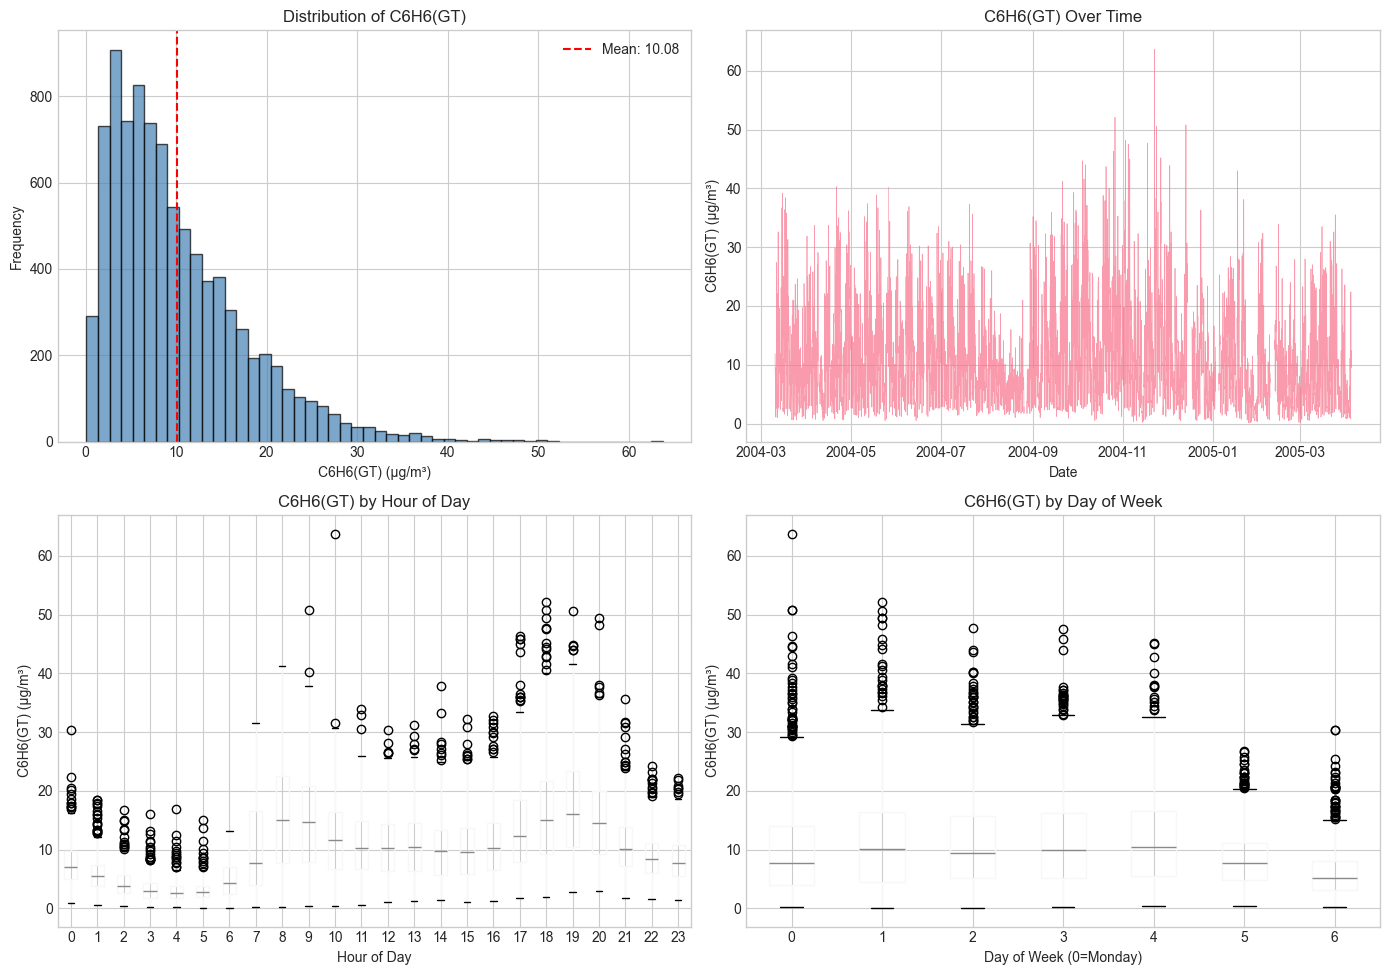

In [11]:
TARGET = 'C6H6(GT)'

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Distribution
axes[0, 0].hist(df_analysis[TARGET].dropna(), bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0, 0].set_xlabel(f'{TARGET} (µg/m³)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title(f'Distribution of {TARGET}')
axes[0, 0].axvline(df_analysis[TARGET].mean(), color='red', linestyle='--', label=f'Mean: {df_analysis[TARGET].mean():.2f}')
axes[0, 0].legend()

# Time series
axes[0, 1].plot(df_analysis.index, df_analysis[TARGET], alpha=0.7, lw=0.5)
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel(f'{TARGET} (µg/m³)')
axes[0, 1].set_title(f'{TARGET} Over Time')

# Box plot by hour
df_temp = df_analysis.copy()
df_temp['Hour'] = df_temp.index.hour
df_temp.boxplot(column=TARGET, by='Hour', ax=axes[1, 0])
axes[1, 0].set_xlabel('Hour of Day')
axes[1, 0].set_ylabel(f'{TARGET} (µg/m³)')
axes[1, 0].set_title(f'{TARGET} by Hour of Day')
plt.suptitle('')  # Remove automatic title

# Box plot by day of week
df_temp['DayOfWeek'] = df_temp.index.dayofweek
df_temp.boxplot(column=TARGET, by='DayOfWeek', ax=axes[1, 1])
axes[1, 1].set_xlabel('Day of Week (0=Monday)')
axes[1, 1].set_ylabel(f'{TARGET} (µg/m³)')
axes[1, 1].set_title(f'{TARGET} by Day of Week')
plt.suptitle('')

plt.tight_layout()
plt.show()

## 6. Feature Correlations

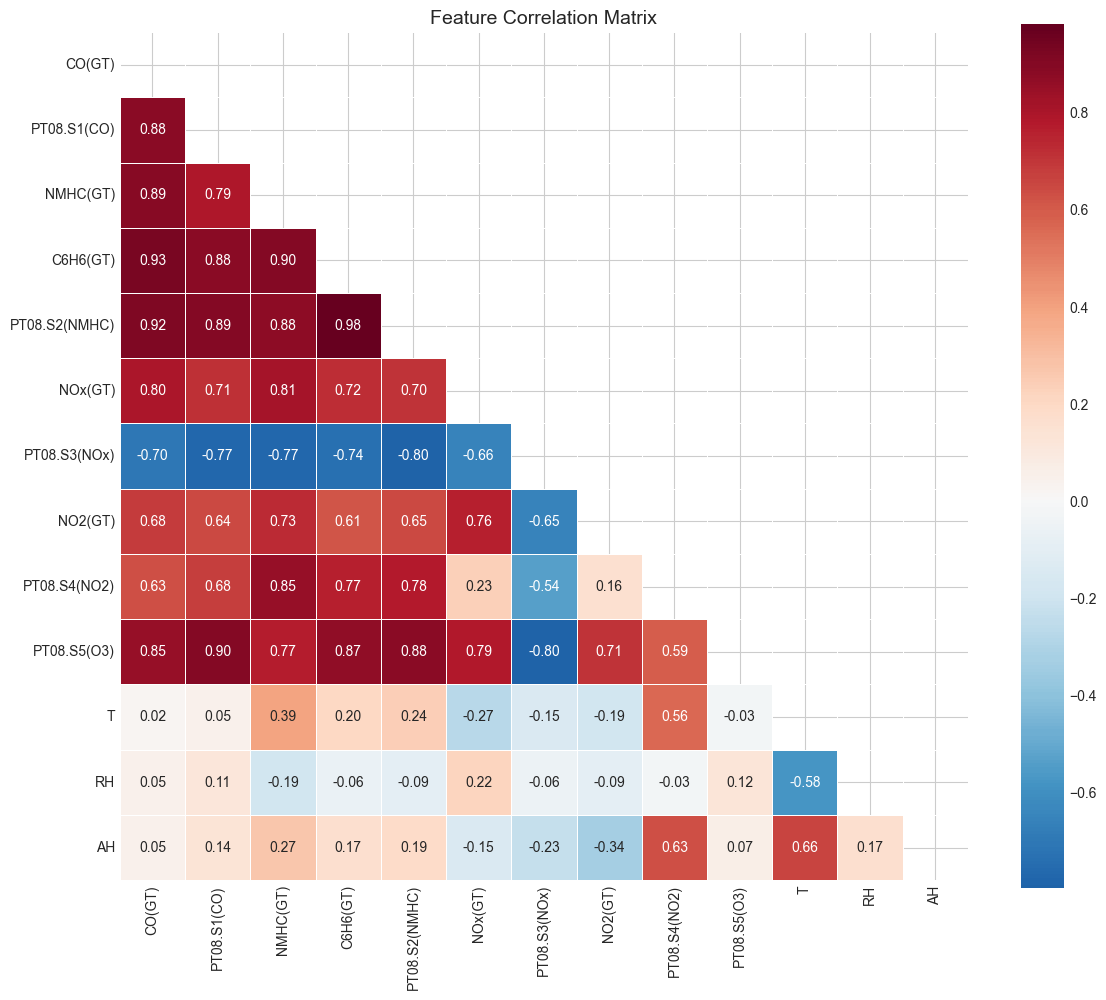

In [12]:
# Correlation matrix
corr_matrix = df_analysis.corr()

# Plot correlation heatmap
fig, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdBu_r',
            center=0, ax=ax, square=True, linewidths=0.5)
ax.set_title('Feature Correlation Matrix', fontsize=14)
plt.tight_layout()
plt.show()

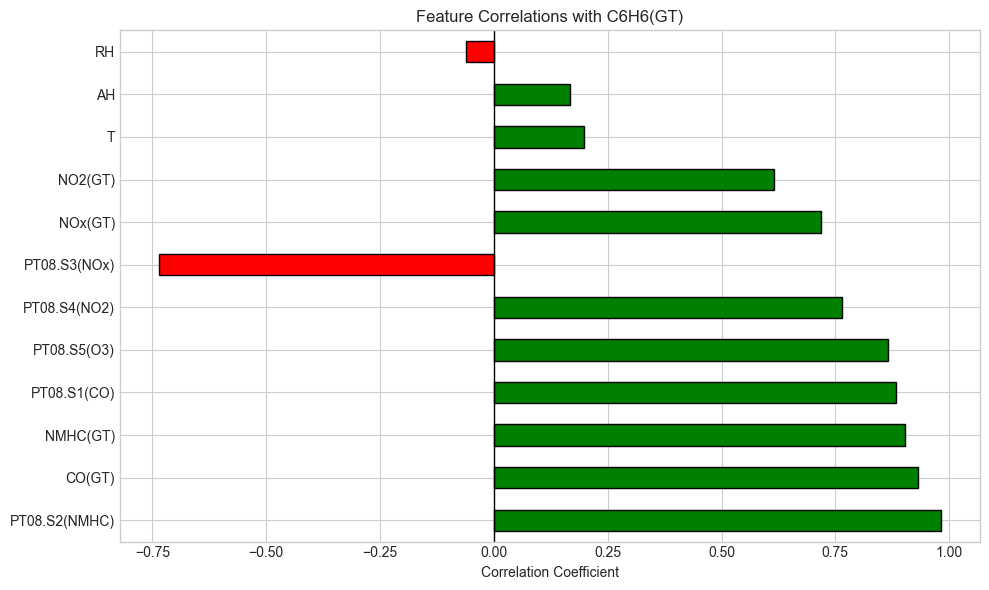


Top correlations with C6H6(GT):
PT08.S2(NMHC)    0.981950
CO(GT)           0.931078
NMHC(GT)         0.902559
PT08.S1(CO)      0.883795
PT08.S5(O3)      0.865689
PT08.S4(NO2)     0.765731
PT08.S3(NOx)    -0.735744
NOx(GT)          0.718839
NO2(GT)          0.614474
T                0.198956
AH               0.167972
RH              -0.061681
Name: C6H6(GT), dtype: float64


In [13]:
# Correlations with target variable
target_corr = corr_matrix[TARGET].drop(TARGET).sort_values(key=abs, ascending=False)

fig, ax = plt.subplots(figsize=(10, 6))
colors = ['green' if x > 0 else 'red' for x in target_corr]
target_corr.plot(kind='barh', ax=ax, color=colors, edgecolor='black')
ax.set_xlabel('Correlation Coefficient')
ax.set_title(f'Feature Correlations with {TARGET}')
ax.axvline(x=0, color='black', linestyle='-', lw=1)
plt.tight_layout()
plt.show()

print(f"\nTop correlations with {TARGET}:")
print(target_corr)

## 7. Key Insights Summary

### Dataset Characteristics:
1. **Temporal Coverage**: ~1 year of hourly data
2. **Missing Values**: NMHC(GT) has highest missing rate (~90%), NOx and NO2 have ~10%
3. **Target Variable (C6H6)**: Right-skewed distribution, clear temporal patterns

### Temporal Patterns Observed:
1. **Rush Hour Peaks**: Pollution increases during morning (8-10 AM) and evening (6-8 PM) rush hours
2. **Night Dip**: Lower concentrations during early morning hours (2-5 AM)
3. **Weekday Effect**: Slight variation between weekdays and weekends

### Feature Relationships:
1. Strong correlation between sensor readings (PT08.S*) and actual concentrations
2. Temperature and humidity show negative correlation with some pollutants
3. CO and C6H6 are highly correlated (similar emission sources)

### Implications for CI Models:
1. **ANN**: Can capture non-linear relationships between sensors and pollutants
2. **LSTM**: Can leverage temporal patterns (hourly/daily cycles)
3. **GA-ANN**: Can optimize for this specific data distribution

In [15]:
# Save key statistics for reference
print("="*60)
print("DATA EXPLORATION SUMMARY")
print("="*60)
print(f"Total samples: {len(df_analysis)}")
print(f"Features: {len(df_analysis.columns)}")
print(f"Date range: {df_analysis.index.min()} to {df_analysis.index.max()}")
print(f"\nTarget variable: {TARGET}")
print(f"  Mean: {df_analysis[TARGET].mean():.2f}")
print(f"  Std: {df_analysis[TARGET].std():.2f}")
print(f"  Min: {df_analysis[TARGET].min():.2f}")
print(f"  Max: {df_analysis[TARGET].max():.2f}")
print("="*60)

DATA EXPLORATION SUMMARY
Total samples: 9357
Features: 13
Date range: 2004-03-10 18:00:00 to 2005-04-04 14:00:00

Target variable: C6H6(GT)
  Mean: 10.08
  Std: 7.45
  Min: 0.10
  Max: 63.70
